# Sales Exploratory Data Analysis

## Main Questions To Answer

- [ ] What is the overall sales trend? 
- [ ] Which are the Top 10 products by sales?
- [ ] Which are the Most Selling Products?
- [ ] Which is the most preferred Ship Mode?
- [ ] Which are the Most Profitable Category and Sub-Category?
- [ ] Which are the Most Product Sold By Quantity?
- [ ] Which are the Most Order Priority?

### Basic Data Imports

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
sns.set_style("darkgrid")

## Load Dataset

In [106]:
df = pd.read_csv("datasets/sales_data_exploration.csv")
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [107]:
df.shape

(51290, 21)

## Data Cleaning

### Missing Values Check

In [108]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

### Date Parsing

In [109]:
df["order_date"] = pd.to_datetime(df["order_date"])

In [110]:
df["ship_date"] = pd.to_datetime(df["ship_date"])

In [111]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                     object
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

In [112]:
interested_cols = ["customer_name", "segment", "state", "country", 
                  "market", "region", "product_id", "category", 
                  "sub_category", "product_name", "ship_mode", 
                   "order_priority"]

In [113]:
for col in interested_cols:
    df[col] = df[col].astype("category")

In [114]:
df["sales"] = df["sales"].apply(lambda x: str(x).replace(",", ""))

In [115]:
df["sales"] = df["sales"].astype("float64")

In [116]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.498440,3.476545,0.142908,28.641740,26.375915,2012.777208
std,487.567175,2.278766,0.212280,174.424113,57.296804,1.098931
min,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,31.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [117]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode               category
customer_name           category
segment                 category
state                   category
country                 category
market                  category
region                  category
product_id              category
category                category
sub_category            category
product_name            category
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority          category
year                       int64
dtype: object

# EDA

## Over All Sales Trend

- Group by month

In [118]:
df["month_year"] = df["order_date"].apply(lambda x: x.strftime("%Y-%m"))

In [119]:
df.month_year

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [120]:
month_year_group = df.groupby("month_year")
month_year_group

In [121]:
month_year_df = month_year_group.sum()
month_year_df.head()

,sales,quantity,discount,profit,shipping_cost,year
month_year,,,,,,
2011-01,98902.0,1463,68.758,8321.80096,10544.82,870763
2011-02,91152.0,1224,52.252,12417.90698,10681.21,760158
2011-03,145726.0,1836,74.212,15303.56826,13096.24,1083929
2011-04,116927.0,2020,80.782,12902.32438,12954.59,1134204
2011-05,146762.0,2013,82.382,12183.82870,16443.21,1138226


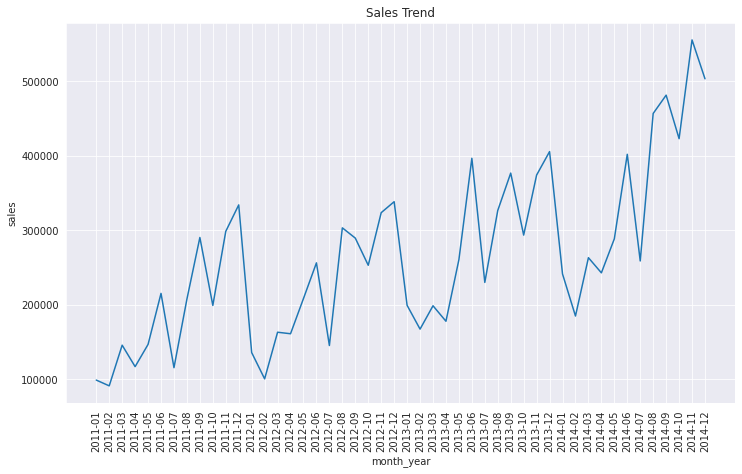

In [139]:
plt.figure(figsize = (12, 7))
sns.lineplot(x = month_year_df.index, y = month_year_df.sales)
plt.xticks(rotation="vertical")
plt.title("Sales Trend")
plt.show()

## Top 10 Products By Sales

In [129]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.770,4.70,Medium,2011,2011-01


In [130]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month_year'],
      dtype='object')

In [136]:
products = df.groupby("product_name").sum().sort_values(by="sales", ascending=False)
products

,sales,quantity,discount,profit,shipping_cost,year
product_name,,,,,,
"Apple Smart Phone, Full Size",86936.0,171,5.44,5921.5786,8027.73,102654
"Cisco Smart Phone, Full Size",76441.0,139,2.07,17238.5206,7065.16,76495
"Motorola Smart Phone, Full Size",73159.0,134,5.61,17027.1130,8817.34,76498
"Nokia Smart Phone, Full Size",71904.0,147,6.79,9938.1955,7852.66,94594
Canon imageCLASS 2200 Advanced Copier,61600.0,20,0.60,25199.9280,1276.32,10068
...,...,...,...,...,...,...
Newell 308,8.0,5,0.00,2.1000,1.49,4023
Grip Seal Envelopes,7.0,2,0.20,2.3868,0.91,2013
Xerox 20,6.0,1,0.00,3.1104,0.61,2012


In [138]:
top_ten_products = products[:10]
top_ten_products

,sales,quantity,discount,profit,shipping_cost,year
product_name,,,,,,
"Apple Smart Phone, Full Size",86936.0,171,5.44,5921.5786,8027.73,102654
"Cisco Smart Phone, Full Size",76441.0,139,2.07,17238.5206,7065.16,76495
"Motorola Smart Phone, Full Size",73159.0,134,5.61,17027.1130,8817.34,76498
"Nokia Smart Phone, Full Size",71904.0,147,6.79,9938.1955,7852.66,94594
Canon imageCLASS 2200 Advanced Copier,61600.0,20,0.60,25199.9280,1276.32,10068
"Hon Executive Leather Armchair, Adjustable",58200.0,169,8.11,5997.2541,5751.56,98638
"Office Star Executive Leather Armchair, Adjustable",50667.0,141,6.47,4710.9840,5141.74,90577
"Harbour Creations Executive Leather Armchair, Adjustable",50120.0,142,6.98,10427.3260,6548.17,78499
"Samsung Smart Phone, Cordless",48654.0,108,3.26,-198.0900,5892.09,52319


In [144]:
list(top_ten_products.index)

['Apple Smart Phone, Full Size',
 'Cisco Smart Phone, Full Size',
 'Motorola Smart Phone, Full Size',
 'Nokia Smart Phone, Full Size',
 'Canon imageCLASS 2200 Advanced Copier',
 'Hon Executive Leather Armchair, Adjustable',
 'Office Star Executive Leather Armchair, Adjustable',
 'Harbour Creations Executive Leather Armchair, Adjustable',
 'Samsung Smart Phone, Cordless',
 'Nokia Smart Phone, with Caller ID']

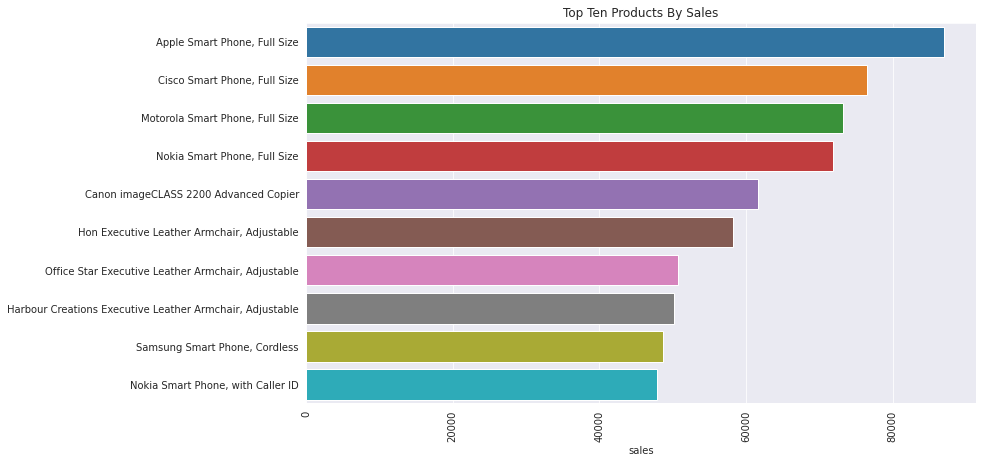

In [147]:
plt.figure(figsize=(12, 7))
sns.barplot(y=list(top_ten_products.index), x=top_ten_products.sales)
plt.title("Top Ten Products By Sales")
plt.xticks(rotation="vertical")
plt.show()

## Most preferred Ship Mode

In [165]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.770,4.70,Medium,2011,2011-01


In [167]:
ship_modes = df["ship_mode"].value_counts().sort_values(ascending=False)
ship_modes

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64

In [169]:
list(ship_modes.index)

['Standard Class', 'Second Class', 'First Class', 'Same Day']

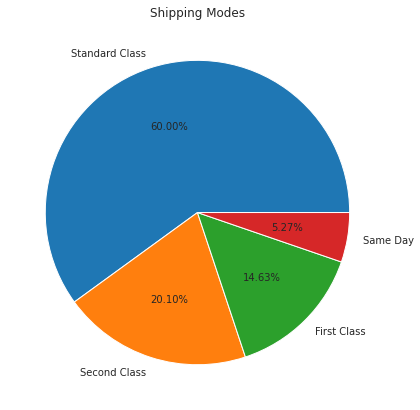

In [173]:
plt.figure(figsize=(12, 7))
plt.pie(x=ship_modes, labels=list(ship_modes.index), autopct='%1.2f%%')
plt.title("Shipping Modes")
plt.xticks(rotation="vertical")
plt.show()

## Most Profitable Category and Sub-Category

In [175]:
category_group = df.groupby("category").sum()
category_group

,sales,quantity,discount,profit,shipping_cost,year
category,,,,,,
Furniture,4110884.0,34954,1660.030,286782.25380,440320.66,19878166
Office Supplies,3787330.0,108182,4297.190,518473.83430,405451.29,62945679
Technology,4744691.0,35176,1372.508,663778.73318,507048.74,20411498


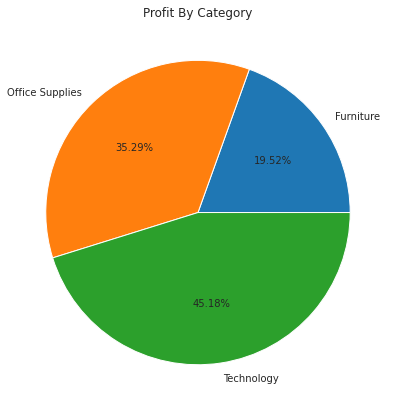

In [177]:
plt.figure(figsize=(12, 7))
plt.pie(x=category_group.profit, labels=list(category_group.index), autopct='%1.2f%%')
plt.title("Profit By Category")
plt.xticks(rotation="vertical")
plt.show()

In [180]:
sub_category_group = df.groupby("sub_category").sum().sort_values(by="profit")
sub_category_group

,sales,quantity,discount,profit,shipping_cost,year
sub_category,,,,,,
Tables,757034.0,3083,250.320,-64083.38870,79861.46,1732979
Fasteners,83254.0,8390,340.240,11525.42410,9053.59,4870955
Labels,73433.0,9322,313.890,15010.51200,8059.88,5245285
Supplies,243090.0,8543,310.200,22583.26310,24812.05,4881018
Envelopes,170926.0,8380,320.810,29601.11630,18547.78,4901146
Furnishings,385609.0,11225,478.880,46967.42550,40747.12,6380451
Art,372163.0,16301,573.080,57953.91090,41287.47,9828413
Machines,779071.0,4906,252.000,58867.87300,79135.90,2990958
Paper,244307.0,12822,387.300,59207.68270,26661.29,7121179


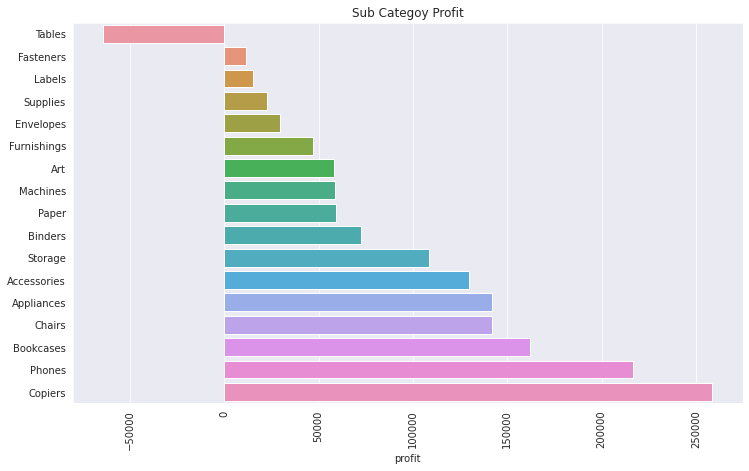

In [181]:
plt.figure(figsize=(12, 7))
sns.barplot(y=list(sub_category_group.index), x=sub_category_group.profit)
plt.title("Sub Categoy Profit")
plt.xticks(rotation="vertical")
plt.show()